<a href="https://colab.research.google.com/github/amandasmagalhaes/data-science-flai/blob/main/M%C3%B3dulo%204.1%20-%20ML%20Medical%20Cost%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medical Cost Data**

## Importação dos dados

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Custos%20M%C3%A9dicos/insurance.csv'
dados = pd.read_csv(url)

In [ ]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
dados.shape

(1338, 7)

## EDA Básica

In [ ]:
!pip install sweetviz #instalando biblioteca de vizualização

     |████████████████████████████████| 15.1MB 250kB/s 
     |████████████████████████████████| 71kB 5.7MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import sweetviz #importando biblioteca

In [ ]:
eda = sweetviz.analyze([dados, 'Seguro Saúde'], target_feat = 'charges')
eda.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


___

# **Fundamentos de Machine Learning**

Inteligência Artificial -> Machine Learning -> Deep Learning  

## **Tipos de ML:**
*   **Aprendizado Supervisionado** (Variável respostas bem definida)  

Os dados possui rótulo e o principal objetivo é prever ou classificar novas observações. Exemplo: classificar um e-mail em spam ou não, o algoritmo é treinado com vários exemplos de e-mail juntos com as classes (spam ou não).  

*   **Aprendizado Não-Supervisionado** (Não tem variável respostas bem definida)  

Os dados não são rotulados e o principal objetivo é identificar padrões nos dados. Exemplo: agrupar clientes mais semelhante, em nehum momento você diz ao algoritmo qual grupo o cliente pertence, o algoritmo terá que fazer essa conexão sozinho.

*   **Aprendizado por Reforço** (Modelo vai aprendendo de acordo com a geração dos dados)  

O sistema de aprendizado, o agente, aprende sozinho interagindo com o ambiente. Aprende por tentativa e erro. Exemplo: AlphaGo desenvolveu suas habilidade no jogo Go analisando milhões de jogos e praticando contra si mesmo.

### **Aprendizado Supervisionado**  
*   **Regressão** (Variável resposta numérica): O objetivo é estimar uma variável resposta de valor real
*   **Classificação** (Variável resposta categorica): O objetivo é estimar uma variável resposta de categória  

Exemplo:
1.   **Modelo para ajustar**: Regressão Linear  
2.   **Métrica para otimizar**: Erro quadrático médio  
3.   **Método para validar**: Vidação HoldOut  
Conjunto de dados: Treino (treino o modelo) e teste (avalia o modelo)  

Em Machine Learning, os pressupostos dos modelos não são importantes, o que importa é o quanto seu modelo consegue de performance em dados que não foram utilizados em seu treinamento.

___

## Algum pré-processamento interessante antes de prosseguir:

- Transformar a variável smoker em 0 (não) ou 1 (sim)
- Colocar a variável resposta na escala para cada mil dolares

In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 

**Variáveis que vamos considerar na análise, nesse primeiro momento: charges, bmi, smoker.**

In [ ]:
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


___

## Gráficos pertinentes

In [ ]:
import seaborn as sns

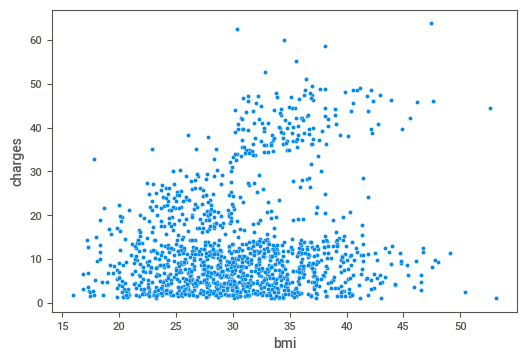

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', data = dados);

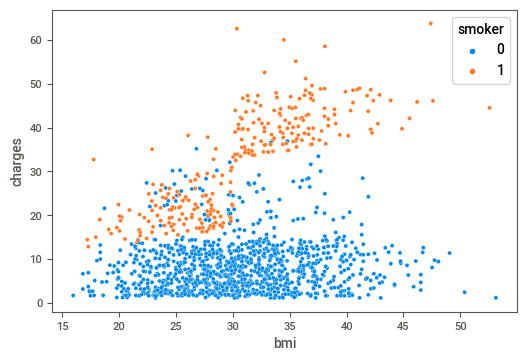

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

___

## Cenário 1: considerando apenas a variável **bmi**.

In [ ]:
X = dados['bmi'].values.reshape(-1, 1)
y = dados['charges'] 

Preparação para a validação do tipo Holdout

In [ ]:
# Holdout
# Separando em dados teste e treinamento 

from sklearn.model_selection import train_test_split 

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

In [ ]:
print(Xtreino.shape)
print(Xteste.shape)

(1003, 1)
(335, 1)


In [ ]:
# Ajuste do modelo de regressão linear
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(Xtreino, ytreino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predição utilizando a amostra teste
preditos = reg.predict(Xteste)
preditos

array([12.32798751, 14.59023106, 12.75415584, 11.16135171, 13.92789445,
       10.38537021, 13.75920282, 14.94004423, 12.07228651, 11.19153863,
       10.45284686, 13.06667928, 10.44929546, 10.82396845, 11.5324733 ,
       10.18294025, 10.41910854, 12.11490335, 11.36378167,  9.94144487,
       12.40966978, 11.09387506, 13.92789445, 11.26966949, 18.6530358 ,
       13.0844363 , 11.62125837, 17.71546548, 16.87378303, 14.17471694,
       17.33546538, 12.78079136, 12.94948299, 13.32060458, 12.36350154,
       14.87256758, 10.26817392, 13.41826815, 11.19509004, 11.6674266 ,
       16.69976429, 12.16817439, 11.59994995, 12.36350154, 12.36350154,
       16.77789515, 13.25312793, 15.41060509, 10.48836089,  8.73219223,
        9.00209884, 11.86985656, 11.63368828, 12.40256697, 12.32798751,
       14.55116563, 10.72275347, 10.85770678, 15.33247423, 16.89509144,
       10.31789356, 15.44611912, 11.36378167, 11.39751999, 13.15191295,
       12.64761376, 15.05901622, 14.70742735, 13.96163277, 13.32

##Métrica de avaliação: Erro quadrático médio

In [ ]:
# Erro Quadrático Médio
from sklearn.metrics import mean_squared_error 
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 170.38


In [ ]:
# Coeficientes
b0 = reg.intercept_
b1 = reg.coef_
print('Intercepto: \n', b0)
print('Coeficientes: \n', b1)

Intercepto: 
 1.8158353866108161
Coeficientes: 
 [0.35514027]


Nesse cenário, o modelo de regressão linear é dado por

 **CUSTOS = b0 + b1 * IMC**

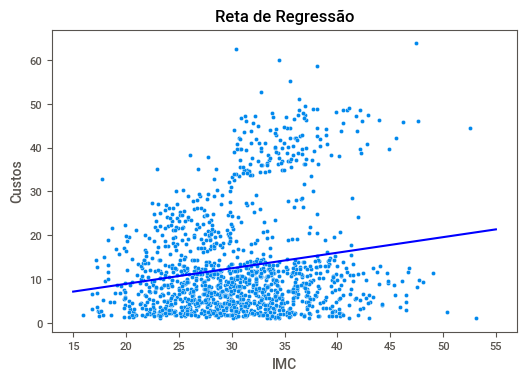

In [ ]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x

import matplotlib.pyplot as plt

sns.scatterplot(x = 'bmi', y = 'charges', data = dados);
plt.plot(x, y0, color = 'blue')
plt.title('Reta de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

___

## Cenário 2: considerando a variável **bmi** e **smoker**.

In [ ]:
X = dados[['bmi', 'smoker']]
y = dados['charges'] 

In [ ]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

reg = LinearRegression()
reg.fit(Xtreino, ytreino)

preditos = reg.predict(Xteste)

eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 50.68


In [ ]:
# Coeficientes
b0 = reg.intercept_
b1, b2 = reg.coef_
print('Intercepto: \n',reg.intercept_)
print('Coeficientes: \n', reg.coef_)

Intercepto: 
 -3.189494395224724
Coeficientes: 
 [ 0.38460072 23.52522745]


In [ ]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

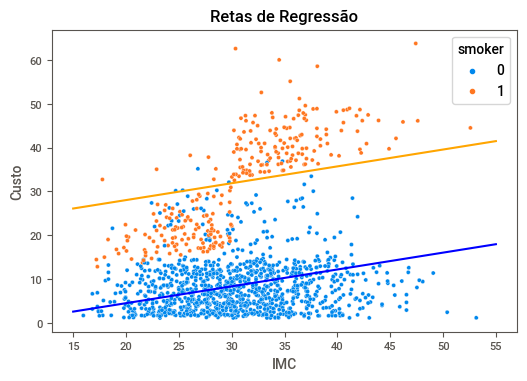

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')
plt.title('Retas de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

___

## **Exercício**

Faça repetições da técnica Holdout, variando a distribuição de quem vai para amostra de teste e treinamento. Guarde os resultados do EQM para cada repetição e, no final, calcule sua média para obter uma valor mais estável para o EQM.

In [ ]:
#Resolução

R = 1000
eqms = []

for i in range(R):
  Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
  reg0 = LinearRegression()
  reg0.fit(Xtreino, ytreino)
  preditos = reg0.predict(Xteste)
  eqm = mean_squared_error(yteste, preditos)
  eqms.append(eqm)
np.mean(eqms)

50.30137767140355